# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Trabalho

1) Trabalhar os Realces das imagens

1.1 - Segmentação OTSU

## Apresentando imagem

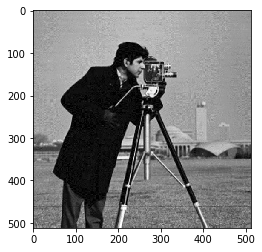

In [25]:
plt.imshow(img, cmap="gray")
plt.show()

### Forma 1 - Biblioteca Skimage
fonte: https://scipy-lectures.org/packages/scikit-image/auto_examples/plot_threshold.html

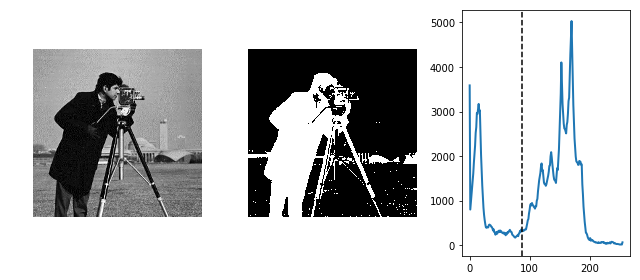

In [26]:
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage import filters
from skimage import exposure

img = cv2.cvtColor(cv2.imread("cameraman.jpg"), cv2.COLOR_BGR2GRAY)
val = filters.threshold_otsu(img)

hist, bins_center = exposure.histogram(img)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(img < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()


### Forma 2 
Fonte: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

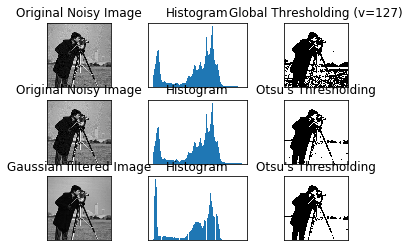

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.cvtColor(cv2.imread("cameraman.jpg"), cv2.COLOR_BGR2GRAY)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import scipy
import scipy.signal
from scipy import ndimage

## Segmentação em Imagens usando OTSU

In [29]:
def threshold(image, L):
  mask = np.zeros(image.shape)
  mask[np.where(image > L)] = 1

  return mask

def histograma(img):
  row, col = img.shape
  hist = np.zeros((256), dtype='uint32')
  for i in range(0,row):
    for j in range(0,col):
      hist[img[i,j]] += 1
  
  return hist

def otsu_segmentation(image):
  row, col = image.shape
  M = row*col

  var_list = []

  hist = histograma(image)
  
  for L in np.arange(0, 256):
    img_theshold = threshold(image, L)

    a = image[np.where(image < L)]
    b = image[np.where(image > L)]
    
    if(len(a)<= 0 or len(b)<=0):
      var_list = var_list + [np.inf]
      continue

    wa = np.sum(hist[:L])/float(M)
    wb = np.sum(hist[L:])/float(M)

    siga = np.var(a)
    sigb = np.var(b)

    var_list = var_list + [wa*siga + wb*sigb]
  
  otsu_L = np.argmin(var_list)
  print(otsu_L)
  new_image = threshold(image, otsu_L)
  
  return new_image

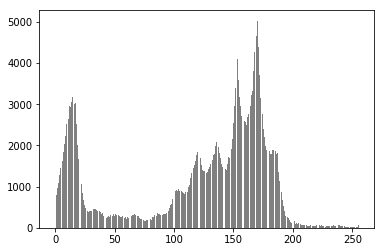

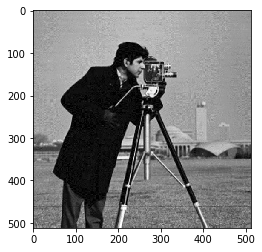

87


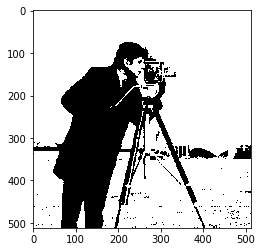

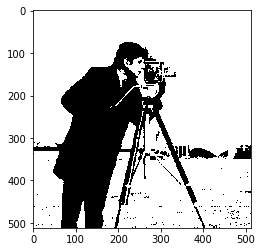

In [30]:
#Apresenta o histograma

row, col = img.shape
h = histograma(img)
x = np.arange(0,256)
plt.bar(x,h,color="gray",align="center")
plt.show()

plt.imshow(img, cmap="gray")
plt.show()

mask = otsu_segmentation(img)
plt.imshow(mask, cmap="gray")
plt.show()

_,mask = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask, cmap="gray")
plt.show()